<a href="https://colab.research.google.com/github/ChoiJMS2/Colab_Study/blob/main/4%EC%9B%94%20%EA%B3%B5%EB%B6%80/20230414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기
 - 외부데이터 url로도 가능

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [9]:
agg_dict = {'Age' : 'mean', 'Fare' : 'median'}
grouped = titanic.groupby('Sex').agg(agg_dict)
result = grouped.reset_index()
result

,Sex,Age,Fare
0,female,27.915709,23.0
1,male,30.726645,10.5


In [10]:
agg_dict = {'Age' : 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
result = grouped.reset_index()
result

Sex        Age   Fare            
                mean median         sum
0  female  27.915709   23.0  13966.6628
1    male  30.726645   10.5  14727.2865

In [19]:
# List Comprehension 사용
agg_dict = {'Age': 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values] # 
grouped.reset_index(inplace=True)
grouped

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


In [23]:
# 위 내용과 같음
agg_dict = {'Age': 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
new_cols = []
for col in grouped.columns:
  if isinstance(col, tuple):
    new_col = f'{col[0]}_{col[1]}'
  else:
    new_col3 = col

  new_cols.append(new_col)

grouped.columns = new_cols
result = grouped.reset_index()
result

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(mpl.__version__)

3.7.1


## matplotlib 객체지향 시각화

In [13]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [37.7, 29.9, 31.8, 25.6, 28.8, 21.8, 22.8, 29.4, 30.8, 32.0]
temp = [1, 2, 3,4, 5, 6, 7, 8, 9, 10]

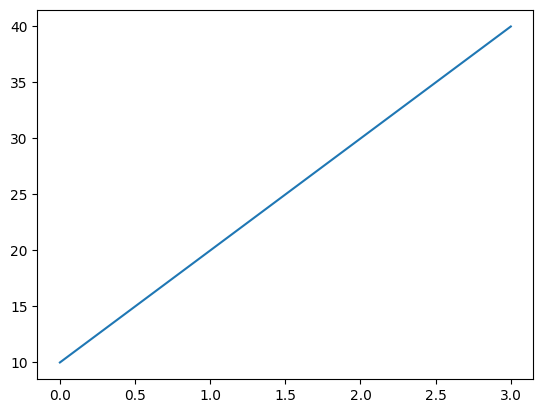

In [4]:
plt.plot([10, 20, 30, 40])
plt.show()

- matplotlib 그릴 때, 객체지향으로 그린다!

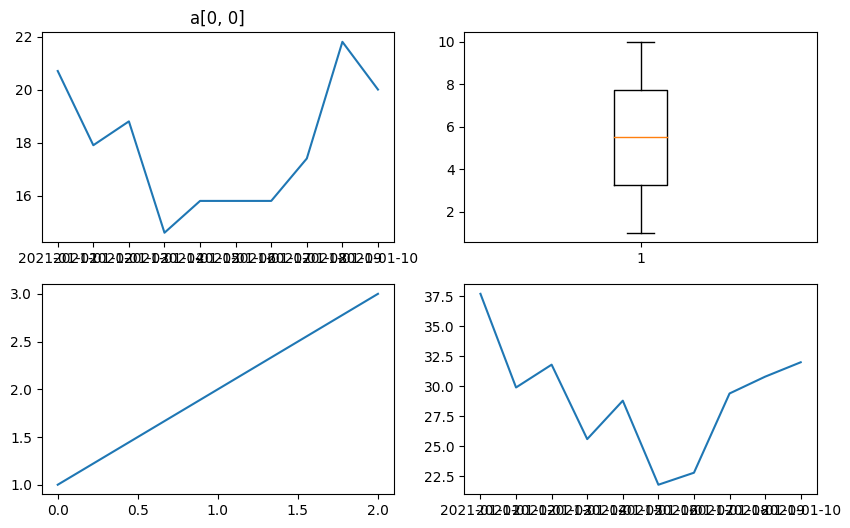

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10, 6))
ax[0, 0].plot(dates, min_temperature, label = 'Min Temp.')
ax[0, 0].set_title("a[0, 0]")
ax[0, 1].boxplot(temp)
ax[1, 0].plot([1, 2, 3])
ax[1, 1].plot(dates, max_temperature, label = 'Max Temp.')
plt.show()

## 선그래프(Line)

In [24]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import yfinance as yf
TSLA = yf.download('TSLA', start = '2019-08-01', end = '2023-04-13')
F = yf.download('F', start = '2019-08-01', end = '2023-04-13')
AAPL = yf.download('AAPL', start = '2019-08-01', end = '2023-04-13')
MSFT = yf.download('MSFT', start = '2019-08-01', end = '2023-04-13')
MMM = yf.download('MMM', start = '2019-08-01', end = '2023-04-13')
SBUX = yf.download('SBUX', start = '2019-08-01', end = '2023-04-13')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


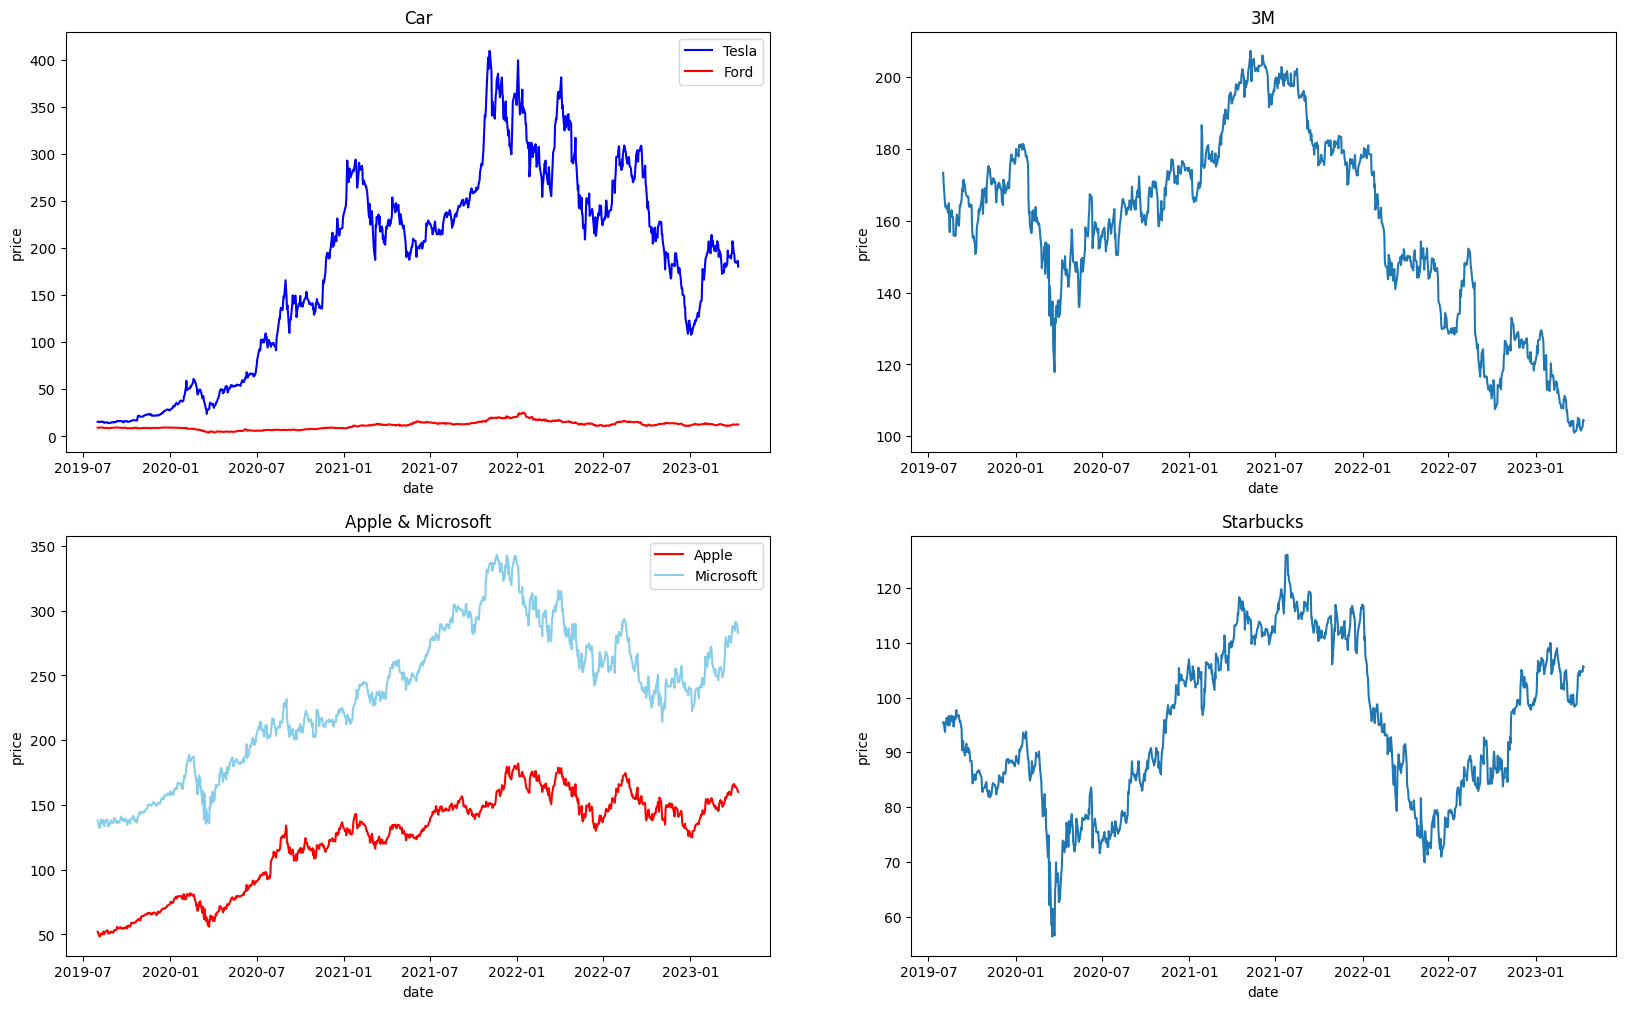

In [55]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(20, 12))
ax[0, 0].plot(TSLA['Close'], label = 'Tesla', color = "blue" )
ax[0, 0].set_title("Car")
ax[0, 0].set_xlabel('date')
ax[0, 0].set_ylabel('price')
ax[1, 0].plot(AAPL['Close'], label = 'Apple', color = "red")
ax[1, 0].plot(MSFT['Close'], label = 'Microsoft', color = "skyblue")
ax[1, 0].legend()
ax[1, 0].set_title("Apple & Microsoft")
ax[1, 0].set_xlabel('date')
ax[1, 0].set_ylabel('price')
ax[0, 1].plot(MMM['Close'], label = '3M')
ax[0, 1].set_title("3M")
ax[0, 1].set_xlabel('date')
ax[0, 1].set_ylabel('price')
ax[1, 1].plot(SBUX['Close'], label = 'Starbucks')
ax[1, 1].set_title("Starbucks")
ax[1, 1].set_xlabel('date')
ax[1, 1].set_ylabel('price')
plt.show()

Text(0, 0.5, 'price')

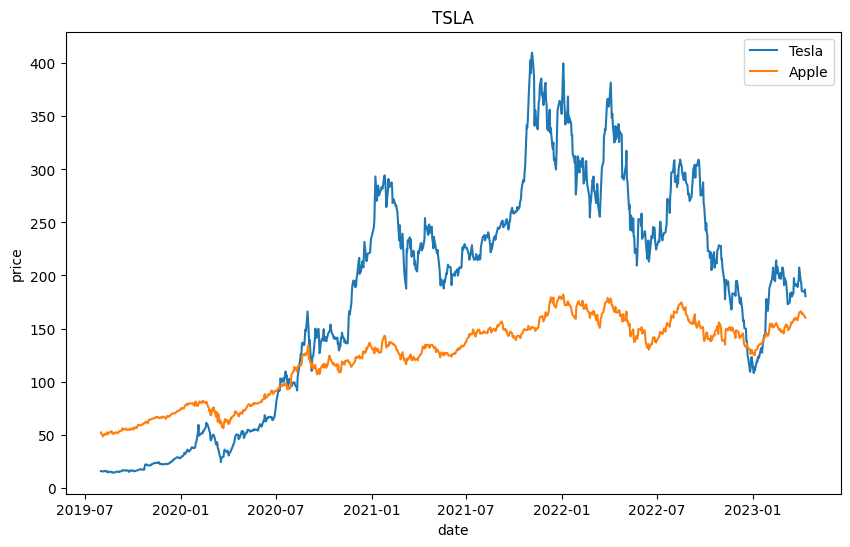

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TSLA['Close'], label = 'Tesla')
ax.plot(AAPL['Close'], label = 'Apple')
ax.legend()
ax.set_title("TSLA")
ax.set_xlabel('date')
ax.set_ylabel('price')

In [57]:
import matplotlib.pyplot
import seaborn as sns
import seaborn as ab

In [58]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


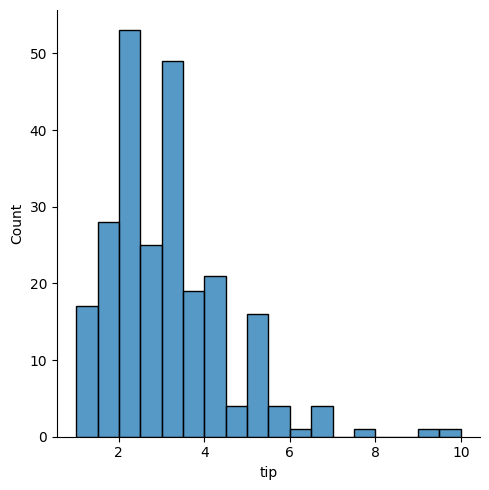

In [59]:
sns.displot(x = "tip", data = tips)

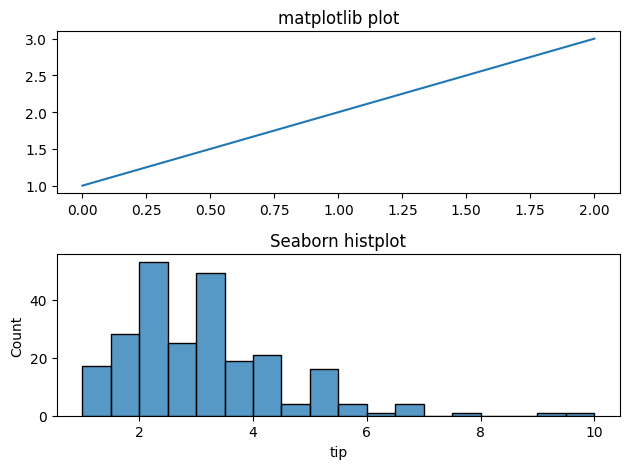

In [66]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot([1, 2, 3])
ax[0].set_title("matplotlib plot")

sns.histplot(x = "tip", data = tips, ax = ax[1])
ax[1].set_title("Seaborn histplot")

plt.tight_layout()
plt.show()

In [69]:
tips['day'].value_counts().index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

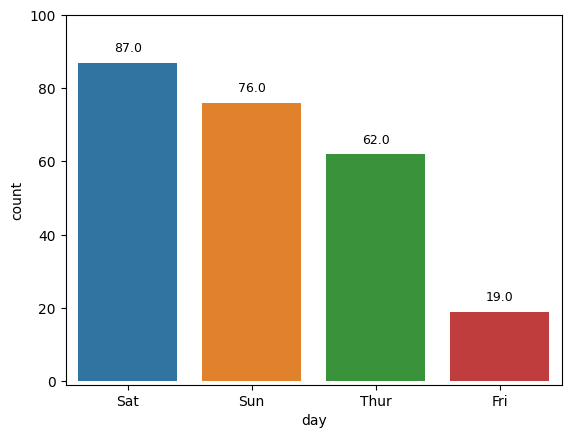

In [77]:
# 막대 그래프
fig, ax = plt.subplots()
ax = sns.countplot(x= 'day', data = tips, order = tips['day'].value_counts().index)
# print("그래프 타입 : ", type(ax))
for p in ax.patches:
  #print(p, type(p))
  height = p.get_height()
# 텍스트 넣기
  ax.text(x = p.get_x() + p.get_width() / 2,
          y = height + 3,
          s = height, ha = 'center',
          size = 9)
  
ax.set_ylim(-1, 100)
plt.show()

# 숙제
https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

업그레이드 시키기